# Week 3: Linear Ballistic Accumulator


In [1]:
# import required python libraries
%matplotlib inline
import numpy as np
import scipy
import random
import matplotlib.pylab as plt 

## LBA definition
The LBA function defined below implements the LBA model as used in Forstmann et al., 2010. This model is defined by five parameters:
1. `A` = starting point range (default = 220)
2. `b` = response boundary (default = 225)
3. `d` = drift rate mean (default = 0.863)
4. `s` = drift rate standard deviation (deafult = 0.332)
5. `t0` = non-decision time (default = 315)

A final variable, `nreps`, can be passed to the function to set the number of random walk simulations the function call will perform (default = 1000). 

The function displays the number and mean/std of the response times of the simulations that reached the correct and incorrect boundary. The function also returns the RTs of the correct and incorrect responses. 

In [45]:
def LBA(A=220,b=225,d=0.863,s=0.332,t0=315,nreps=1000):
    rt = []
    response = []
    for n in range(nreps):
        # correct accumulator
        starting1 = np.random.random(1)*A
        drift1 = np.random.randn(1)*s+d
        while drift1<0 or drift1>1:
            drift1 = np.random.randn(1)*s+d
        tmprt1 = (b-starting1)/drift1+t0
        # incorrect accumulator
        starting2 = np.random.random(1)*A
        drift2 = 1-drift1
        tmprt2 = (b-starting2)/drift2+t0
        
        # which is faster?
        if tmprt1<tmprt2:
            rt.append(tmprt1)
            response.append(1)
        else:
            rt.append(tmprt2)
            response.append(2)        
    rtcor = [rt[x] for x in range(n) if response[x]==1]
    rtinc = [rt[x] for x in range(n) if response[x]==2]
    if len(rtcor)>0:
        print 'Correct: N %i, mean %.1f, std %.1f'%(len(rtcor),np.mean(rtcor),np.std(rtcor))
    else:
        print 'Correct: N 0'
        rtcor = []
    if len(rtinc)>0:
        print 'Incorrect: N %i, mean %.1f, std %.1f'%(len(rtinc),np.mean(rtinc),np.std(rtinc))
    else:
        print 'Incorrect: N 0'
        rtinc = []
    return rtcor,rtinc

## Simulations using parameters from Forstmann et al., 2010
Forstmann et al. (2010) found that cued and uncued responses to random dot motion were best accounted for with a LBA variant that had separate response boundary parameters for cued and uncued responses. All other parameters were the same for the cued and uncued conditions. The average parameter values from the article are used below:

Cued
Correct: N 7264, mean 452.7, std 83.6
Incorrect: N 2735, mean 455.4, std 89.4
Uncued
Correct: N 7648, mean 525.0, std 87.3
Incorrect: N 2351, mean 551.4, std 92.0


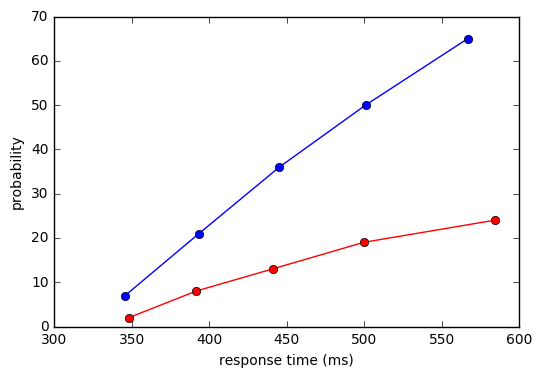

In [64]:
b_cued = 225
b_uncued = 275
A = 220
d = 0.863
s = 0.332
nreps = 10000

print 'Cued'
rtcorcued,rtinccued = LBA(A=A,b=b_cued,d=d,s=s,nreps=nreps)

print 'Uncued'
rtcoruncued,rtincuncued = LBA(A=A,b=b_uncued,d=d,s=s,nreps=nreps)

pc = np.array([10,30,50,70,90])
qcor_cued = np.percentile(rtcorcued,pc)
qinc_cued = np.percentile(rtinccued,pc)
plt.plot(qcor_cued,pc*len(rtcorcued)/nreps,'-ob')
plt.plot(qinc_cued,pc*len(rtinccued)/nreps,'-or')
plt.ylabel('probability')
plt.xlabel('response time (ms)');

As Forstmann et al. (2010) showed, changing the response boundary matches the RT differences they found between the cued and uncued conditions.

One alternative hypothesis is that changes in drift rate could explain the behavioural differences between the cued and uncued conditions. We can test that with a model simulation:

In [44]:
b = 225
A = 220
d_cued = 0.863 # separate drift rate means for
d_uncued = 0.6 # cued and uncued conditions
s = 0.332
nreps = 10000

print 'Cued'
rtlcued,rtrcued = LBA(A=A,b=b,d=d_cued,s=s,nreps=nreps)

print 'Uncued'
rtluncued,rtunrcued = LBA(A=A,b=b,d=d_uncued,s=s,nreps=nreps)

Cued
Correct: N 7299, mean 451.8, std 83.5
Incorrect: N 2700, mean 455.0, std 87.8
Uncued
Correct: N 5633, mean 456.2, std 86.9
Incorrect: N 4366, mean 456.6, std 89.2


However, changing the drift rate only changes the response frequencies instead of the mean difference in RT that Forstmann et al. (2010) observed. Thus, changes to response boundary is a better account of the cueing effect.